In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import ast
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
from re import sub

data = pd.read_csv('listings (1) 2.csv')
data.head()

,id,listing_url,name,description,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,284210.0,https://www.airbnb.com/rooms/284210,Fitzroyalty - stylish and central,"In the heart of Fitzroy, immerse yourself in t...",I love Fitzroy because is is walking distance ...,Kate,12/7/2011,NaN,NaN,NaN,NaN,f,Collingwood/Fitzroy,2.0,2.0,"Melbourne, Victoria, Australia",Yarra,-37.79951,144.97948,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Cleaning avail...",$245.00,2,66,66,2.0,66.0,t,0,3/14/2023,34,4.85,4.91,4.67,4.88,4.85,4.97,4.61,f,1,1,0,0,0.31
1,999067.0,https://www.airbnb.com/rooms/999067,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,3/16/2013,"Melbourne, Australia",within an hour,100%,98%,f,Richmond,2.0,2.0,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",$132.00,2,14,1125,2.0,1125.0,t,12,3/14/2023,741,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11
2,10803.0,https://www.airbnb.com/rooms/10803,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,9/16/2009,"Melbourne, Australia",within a few hours,100%,98%,f,Brunswick,1.0,1.0,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",$39.00,4,27,27,4.0,27.0,t,112,3/14/2023,169,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37
3,12936.0,https://www.airbnb.com/rooms/12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,The A2C Team,10/31/2009,"Melbourne, Australia",NaN,NaN,NaN,f,St Kilda,10.0,20.0,"St Kilda, Victoria, Australia",Port Phillip,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Microwave"", ""E...",$95.00,3,14,14,3.0,14.0,t,0,3/14/2023,42,4.68,4.78,4.71,4.83,4.83,4.78,4.66,f,10,10,0,0,0.27
4,289467.0,https://www.airbnb.com/rooms/289467,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,11/28/2011,"Melbourne, Australia",within a few hours,100%,78%,t,NaN,2.0,2.0,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",$270.00,2,365,365,2.0,365.0,t,365,3/13/2023,8,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09


In [2]:
data= data.drop('listing_url',axis=1)
data= data.drop('maximum_maximum_nights',axis=1)
data= data.drop('calculated_host_listings_count',axis=1)
data= data.drop('calculated_host_listings_count_entire_homes',axis=1)
data= data.drop('calculated_host_listings_count_private_rooms',axis=1)
data= data.drop('calculated_host_listings_count_shared_rooms',axis=1)


In [3]:
#how many NaNs in the dataset?

data.isnull().sum().sum()

88710

In [4]:
#how many NaNs in description column in the dataset?

data.description.isnull().sum()

374

In [5]:
#how many NaNs in neighborhood_overview column in the dataset?

data.neighborhood_overview.isnull().sum()

8551

In [6]:
#how many NaNs in host_location column in the dataset?

data.host_location.isnull().sum()

5168

In [7]:
#how many NaNs in host_response_time column in the dataset?

data.host_response_time.isnull().sum()

7129

In [8]:
#how many NaNs in host_response_rate column in the dataset?

data.host_response_rate.isnull().sum()

7129

In [9]:
#how many NaNs in host_acceptance_rate column in the dataset?

data.host_acceptance_rate.isnull().sum()

6365

In [10]:
#how many NaNs in host_neighbourhood column in the dataset?

data.host_neighbourhood.isnull().sum()

12181

In [11]:
#replace the NaNs in columns bellow

data[['id','name','description','neighborhood_overview','host_name','host_since','host_location','host_response_time',
'host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count',
'neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds',
'amenities','price','minimum_nights','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
'has_availability','availability_365','calendar_last_scraped','number_of_reviews','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
'instant_bookable','reviews_per_month']] = data[['id','name','description','neighborhood_overview','host_name','host_since','host_location','host_response_time',
'host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count',
'neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds',
'amenities','price','minimum_nights','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
'has_availability','availability_365','calendar_last_scraped','number_of_reviews','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
'instant_bookable','reviews_per_month']].fillna(value='None')
data.head()

,id,name,description,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,284210.0,Fitzroyalty - stylish and central,"In the heart of Fitzroy, immerse yourself in t...",I love Fitzroy because is is walking distance ...,Kate,12/7/2011,None,None,None,None,f,Collingwood/Fitzroy,2.0,2.0,"Melbourne, Victoria, Australia",Yarra,-37.79951,144.97948,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Cleaning avail...",$245.00,2,66,2.0,66.0,t,0,3/14/2023,34,4.85,4.91,4.67,4.88,4.85,4.97,4.61,f,0.31
1,999067.0,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,3/16/2013,"Melbourne, Australia",within an hour,100%,98%,f,Richmond,2.0,2.0,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",$132.00,2,14,2.0,1125.0,t,12,3/14/2023,741,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,6.11
2,10803.0,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,9/16/2009,"Melbourne, Australia",within a few hours,100%,98%,f,Brunswick,1.0,1.0,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",$39.00,4,27,4.0,27.0,t,112,3/14/2023,169,4.48,4.64,3.97,4.72,4.69,4.65,4.6,f,1.37
3,12936.0,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,The A2C Team,10/31/2009,"Melbourne, Australia",None,None,None,f,St Kilda,10.0,20.0,"St Kilda, Victoria, Australia",Port Phillip,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Microwave"", ""E...",$95.00,3,14,3.0,14.0,t,0,3/14/2023,42,4.68,4.78,4.71,4.83,4.83,4.78,4.66,f,0.27
4,289467.0,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,None,Margaret Jiin,11/28/2011,"Melbourne, Australia",within a few hours,100%,78%,t,None,2.0,2.0,None,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",$270.00,2,365,2.0,365.0,t,365,3/13/2023,8,4.75,4.88,4.75,4.88,4.5,5.0,4.75,f,0.09


In [12]:
#view first few values of a random column to check is there is any NaN
data['host_response_rate'].head()

0    None
1    100%
2    100%
3    None
4    100%
Name: host_response_rate, dtype: object

In [13]:
#adjust columns that are T/F to show True/False
data['host_is_superhost'] = data['host_is_superhost'].map({'t': "true", 'f': "false"})
data['has_availability'] = data['has_availability'].map({'t': "true", 'f': "false"})
data['instant_bookable'] = data['instant_bookable'].map({'t': "true", 'f': "false"})


In [14]:
# removing null values to avoid errors
data.dropna(inplace=True)

In [15]:
#Check for null values

print(data.isnull().any()) 

#all of the null values have been fixed.


id                             False
name                           False
description                    False
neighborhood_overview          False
host_name                      False
host_since                     False
host_location                  False
host_response_time             False
host_response_rate             False
host_acceptance_rate           False
host_is_superhost              False
host_neighbourhood             False
host_listings_count            False
host_total_listings_count      False
neighbourhood                  False
neighbourhood_cleansed         False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bathrooms_text                 False
bedrooms                       False
beds                           False
amenities                      False
price                          False
minimum_nights                 False
m

In [16]:
data['index'] = np.arange(1, len(data['id'])+1)

data.head()

,id,name,description,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,index
0,284210.0,Fitzroyalty - stylish and central,"In the heart of Fitzroy, immerse yourself in t...",I love Fitzroy because is is walking distance ...,Kate,12/7/2011,None,None,None,None,false,Collingwood/Fitzroy,2.0,2.0,"Melbourne, Victoria, Australia",Yarra,-37.79951,144.97948,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Cleaning avail...",$245.00,2,66,2.0,66.0,true,0,3/14/2023,34,4.85,4.91,4.67,4.88,4.85,4.97,4.61,false,0.31,1
1,999067.0,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,3/16/2013,"Melbourne, Australia",within an hour,100%,98%,false,Richmond,2.0,2.0,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",$132.00,2,14,2.0,1125.0,true,12,3/14/2023,741,4.88,4.91,4.97,4.94,4.93,4.93,4.82,false,6.11,2
2,10803.0,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,9/16/2009,"Melbourne, Australia",within a few hours,100%,98%,false,Brunswick,1.0,1.0,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",$39.00,4,27,4.0,27.0,true,112,3/14/2023,169,4.48,4.64,3.97,4.72,4.69,4.65,4.6,false,1.37,3
3,12936.0,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,The A2C Team,10/31/2009,"Melbourne, Australia",None,None,None,false,St Kilda,10.0,20.0,"St Kilda, Victoria, Australia",Port Phillip,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Microwave"", ""E...",$95.00,3,14,3.0,14.0,true,0,3/14/2023,42,4.68,4.78,4.71,4.83,4.83,4.78,4.66,false,0.27,4
4,289467.0,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,None,Margaret Jiin,11/28/2011,"Melbourne, Australia",within a few hours,100%,78%,true,None,2.0,2.0,None,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",$270.00,2,365,2.0,365.0,true,365,3/13/2023,8,4.75,4.88,4.75,4.88,4.5,5.0,4.75,false,0.09,5


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20759 entries, 0 to 20767
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20759 non-null  float64
 1   name                         20759 non-null  object 
 2   description                  20759 non-null  object 
 3   neighborhood_overview        20759 non-null  object 
 4   host_name                    20759 non-null  object 
 5   host_since                   20759 non-null  object 
 6   host_location                20759 non-null  object 
 7   host_response_time           20759 non-null  object 
 8   host_response_rate           20759 non-null  object 
 9   host_acceptance_rate         20759 non-null  object 
 10  host_is_superhost            20759 non-null  object 
 11  host_neighbourhood           20759 non-null  object 
 12  host_listings_count          20759 non-null  object 
 13  host_total_listi

In [18]:
#Export csv file
data.to_csv(r'data_clean_bnb.csv', index=False)

In [19]:
#The 10 most common listing locations in Melbourne.

location_DF=data["host_location"].value_counts()[:10]
location_DF=location_DF.reset_index()
location_DF

,index,host_location
0,"Melbourne, Australia",5627
1,None,5168
2,"Victoria, Australia",1970
3,"Sydney, Australia",415
4,Australia,400
5,"South Yarra, Australia",234
6,"St Kilda, Australia",140
7,"Carlton, Australia",135
8,"Southbank, Australia",131
9,"Elwood, Australia",121


In [20]:
roomType_DF=data.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF

,room_type,id
0,Entire home/apt,15065
1,Hotel room,71
2,Private room,5376
3,Shared room,247


<Axes: title={'center': 'Room Type Distribution'}, ylabel='room_type'>

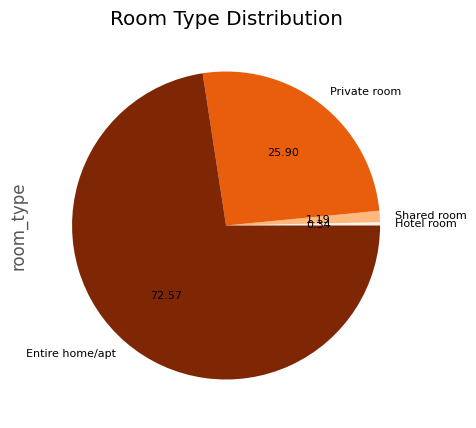

In [21]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from collections import Counter

room =data.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Oranges', 
                 figsize=(5,5), 
                 fontsize = 8, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20759 entries, 0 to 20767
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20759 non-null  float64
 1   name                         20759 non-null  object 
 2   description                  20759 non-null  object 
 3   neighborhood_overview        20759 non-null  object 
 4   host_name                    20759 non-null  object 
 5   host_since                   20759 non-null  object 
 6   host_location                20759 non-null  object 
 7   host_response_time           20759 non-null  object 
 8   host_response_rate           20759 non-null  object 
 9   host_acceptance_rate         20759 non-null  object 
 10  host_is_superhost            20759 non-null  object 
 11  host_neighbourhood           20759 non-null  object 
 12  host_listings_count          20759 non-null  object 
 13  host_total_listi

In [23]:
import sqlite3
# create a connection to an SQLite database
with sqlite3.connect('airbnb_data.db') as con:

# write the dataframe to an SQLite table
    data.to_sql('airbnb_clean', con=con, if_exists='replace', index=False, dtype={'index': 'INTEGER PRIMARY KEY AUTOINCREMENT'})

con.commit()
# close the database connection
con.close()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20759 entries, 0 to 20767
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20759 non-null  float64
 1   name                         20759 non-null  object 
 2   description                  20759 non-null  object 
 3   neighborhood_overview        20759 non-null  object 
 4   host_name                    20759 non-null  object 
 5   host_since                   20759 non-null  object 
 6   host_location                20759 non-null  object 
 7   host_response_time           20759 non-null  object 
 8   host_response_rate           20759 non-null  object 
 9   host_acceptance_rate         20759 non-null  object 
 10  host_is_superhost            20759 non-null  object 
 11  host_neighbourhood           20759 non-null  object 
 12  host_listings_count          20759 non-null  object 
 13  host_total_listi